### Data

In [1]:
# For example, creating a simple plot:
import numpy as np
x = np.linspace(0, 2*np.pi, 1000)
y = np.cos(x)

### Set plot style

In [2]:
import matplotlib.pyplot as plt

# Now, apply your custom style sheet
plt.style.use('style_file/publication.mplstyle')

Duplicate key in file 'style_file/publication.mplstyle', line 19 ('text.usetex : False')
Duplicate key in file 'style_file/publication.mplstyle', line 21 ('font.family : serif')


### Choose color scheme

In Matplotlib, colormaps are categorized into three types:

1. **Sequential Colormaps**: Used for representing ordered data varying in magnitude. Examples include 'viridis', 'plasma', 'inferno', and 'magma'.
    
2. **Diverging Colormaps**: Ideal for data with a central neutral point, diverging to different extremes. Examples include 'coolwarm', 'seismic', and 'PiYG'.
    
3. **Qualitative Colormaps**: Best for categorical data where each color represents a different category. Examples are 'tab10', 'tab20', 'Pastel1', and 'Set3'.

In [3]:
from cycler import cycler
import numpy as np
import matplotlib.ticker as ticker


# Example: Generate colors from the 'magma' colormap
num_colors = 4
colors = plt.cm.magma(np.linspace(0, 1, num_colors))

# Update rcParams with generated color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

### Plot and enhance

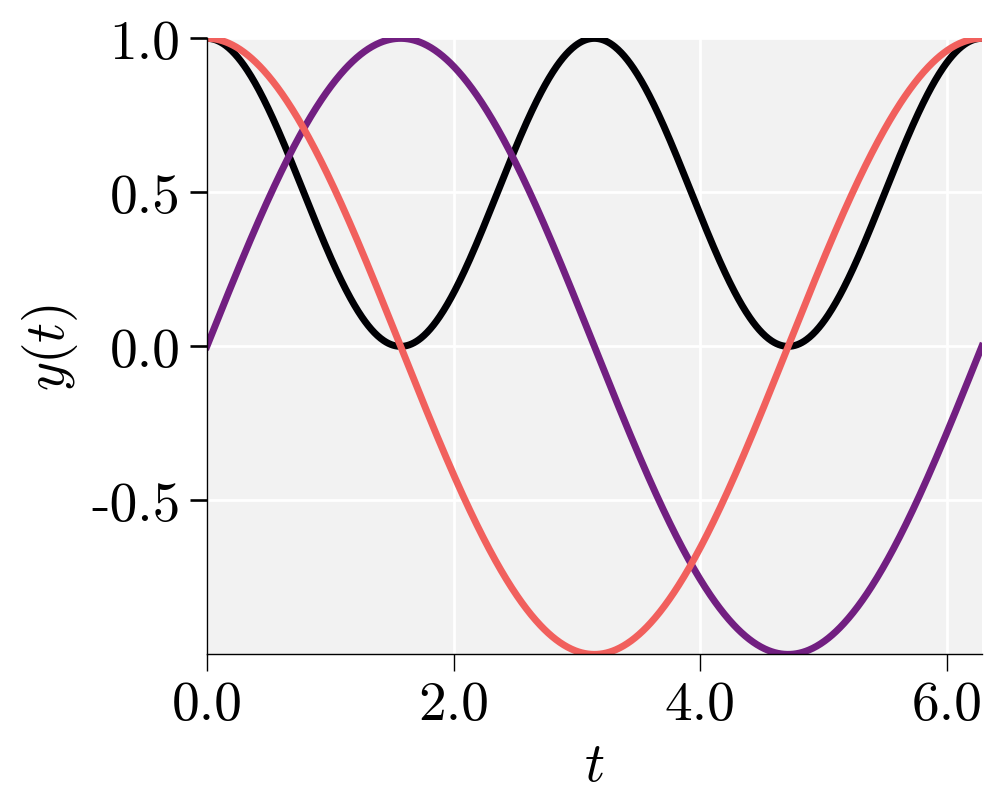

In [4]:
# Plot data
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x,y**2)
ax.plot(x,np.sin(x))
ax.plot(x,y**1)

# Label axis
ax.set_xlabel("$t$")
ax.set_ylabel("$y(t)$")

# Automatically adjust the axis limits to be tight around the data
ax.autoscale(axis='both', tight=True)

# Add legend
# plt.legend(['$y_1$','$y_2$','$y_3$'])


# Set the format for tick labels
import matplotlib.ticker as ticker
format_str = '%.1f'  # Two decimal places; adjust as needed
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(format_str))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(format_str))


# Display the figure
plt.savefig('test.png')
# plt.margins(0.01)
plt.show()
